In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sympy import diff, symbols, cos, sin
import random


In [99]:
def my_func(x):
    return np.sin(x*3) + np.cos(6*x) + np.sin(x)

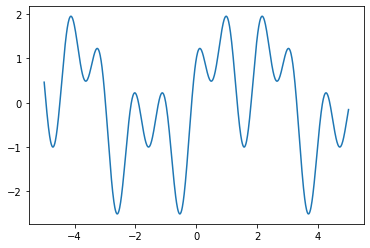

In [100]:
x = np.linspace(-5, 5, 1001)
y = my_func(x) #+ np.sin(x * 25.5)

plt.plot(x, y)

In [101]:
from scipy.misc import derivative

In [102]:
def grad(fun, x_0, alpha, eps):
    x = 1000
    x_l = list()
    x_l.append(x_0)
    while (1):
        if abs(x - x_0) < eps:
            break
        x = x_0
        x_0 = x - alpha * derivative(fun, x,  dx=1e-6)
        x_l.append(x_0)
    return x, np.array(x_l)

In [103]:
def find_global(fun, alpha, eps, a, b, size):
    m=10000
    newArray = np.random.randint(a*m, b*m, size)/m
    gl = fun(newArray[0])
    print(newArray)
    for el in newArray:
        x1, _ = grad(fun, el, alpha, eps)
        
        if (fun(x1) < gl):
            gl = x1
            
    return gl


In [104]:
from scipy.optimize import minimize

In [127]:
x0 = -0.5
res = minimize(my_func, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: -2.508248
         Iterations: 24
         Function evaluations: 48
[-0.54266379]


In [128]:
my_min, x_l = grad(my_func, x0, 0.001, 1e-8)
my_min

-0.5426635689660948

In [129]:
my_func(my_min)

-2.5082483151202197

In [130]:

y_l = my_func(x_l)

In [175]:
gl = find_global(my_func, alpha=0.001, eps=1e-8, a=2, b=4, size=10)
gl

[2.6611 2.3808 3.1154 3.5239 3.5459 2.7222 3.4817 2.6702 3.2316 3.9238]


3.684256655239049

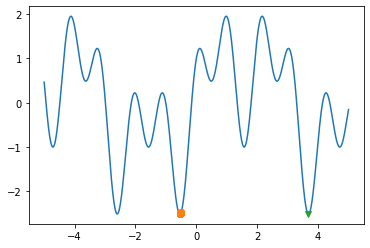

In [176]:
plt.plot(x, y)
plt.plot(x_l, y_l, 'o')
plt.plot(gl, my_func(gl),'v')

In [156]:
my_func(gl)

-2.5082483151202624